# LINEAR REGRESSION SHOWING PROFIT OF A FOOD TRUCK IN VARIOUUS CITIES

## *This is a mathematically implemented model of linear regression on a single variable, mean normalization has also been done on the input variables.*

In [1]:
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request as rq
import pandas as pd

In [2]:
df = pd.read_csv("d:/DATASETS/ex1data1.txt", header = None)

pd.set_option('display.max_rows', 500)
x = np.array(df.iloc[:, 0]).reshape(df.shape[0], 1)
g = (x-x.mean())/x.std()   #need some feature scaling, cuz the input data was of very different ranges.

FileNotFoundError: [Errno 2] No such file or directory: 'd:/DATASETS/ex1data1.txt'

In [28]:
population = np.hstack((np.ones((97,1)),g))
profit = np.array(df.iloc[:, 1]).reshape(df.shape[0], 1)
theta = np.zeros((2,1))

In [29]:
def computecost(x,y,theta):
    m = x.shape[0]
    dot = np.dot(x,theta)-y
    temp = np.sum(np.power(dot,2))
    res = temp/(2*m)
    return res

j = computecost(population, profit, theta)
j

32.072733877455676

In [30]:
def gdescent(x,y,parameter,alpha,itera):
    m = x.shape[0]
    li=[]
    for i in range(itera):
        li.append(0)
        temp = np.dot(x,parameter)-y
        res = np.dot(x.T,temp)
        parameter = parameter - ((alpha/m)*(np.sum(res)))
        g = computecost(x,y,parameter)
        li[i] = g
    return parameter, li
    
iterations = 1500
alpha = 0.1
lii=[]
theta, lii = gdescent(population,profit,theta,alpha,iterations)
j = computecost(population,profit,theta)
lii


[22.278006881686743,
 16.00938160439464,
 11.997461426927686,
 9.429832513348838,
 7.786550008658375,
 6.734849205656481,
 6.061760691735267,
 5.63098404282569,
 5.355286987523561,
 5.178840872130199,
 5.065915358278448,
 4.993643029413326,
 4.947388738939648,
 4.917785993036495,
 4.898840235658476,
 4.886714950936546,
 4.878954768714509,
 4.873988252092405,
 4.87080968145426,
 4.868775396245845,
 4.867473453712461,
 4.866640210491096,
 4.86610693482942,
 4.865765638405949,
 4.865547208694928,
 4.865407413679874,
 4.865317944870239,
 4.865260684832073,
 4.865224038407646,
 4.865200584696014,
 4.865185574320569,
 4.865175967680283,
 4.865169819430503,
 4.865165884550641,
 4.86516336622753,
 4.865161754500739,
 4.865160722995593,
 4.865160062832299,
 4.865159640327791,
 4.865159369924907,
 4.86515919686706,
 4.865159086110038,
 4.865159015225545,
 4.8651589698594675,
 4.86515894082518,
 4.865158922243235,
 4.86515891035079,
 4.865158902739625,
 4.86515889786848,
 4.865158894750947,
 4.86

**THE COST FUNCTION REDUCED TO 4.865160062832299**<BR>
**THE BEST VALUES FOR THETA ARE 5.21522142 and 5.21522142**


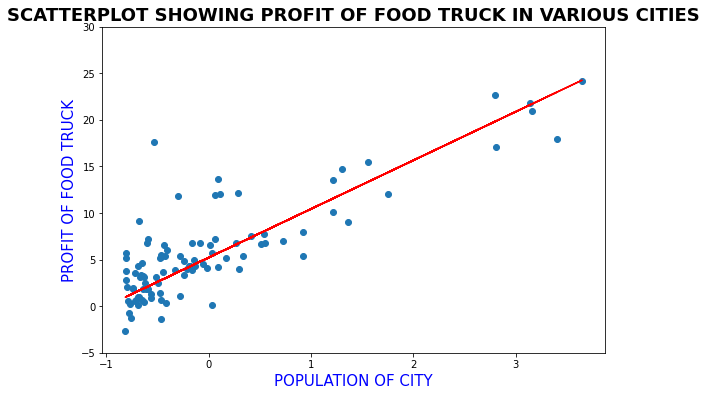

In [255]:
plt.figure(figsize = (9,6))
plt.scatter(population[:, 1], profit);
plt.plot(population[:,1], np.dot(population,theta), color= "red")

plt.xlabel("POPULATION OF CITY", color = "blue", fontsize = 15)
plt.ylabel("PROFIT OF FOOD TRUCK", color = "blue", fontsize = 15)
plt.yticks([-5,0,5,10,15,20,25,30])
plt.title("SCATTERPLOT SHOWING PROFIT OF FOOD TRUCK IN VARIOUS CITIES", fontsize= 18, color = "black", fontweight="bold");


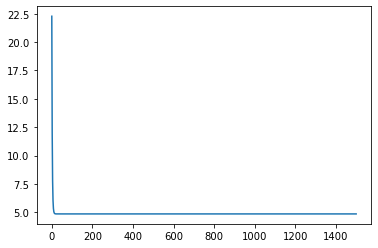

In [33]:
f = [i for i in range(500)]
plt.plot(lii)